<br>

## 부산 서면 맛집추천

In [1]:
#사용했던 라이브러리들

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import numpy as np

from bs4 import BeautifulSoup 

import time

import pandas as pd

# 1. 이전에 전처리 했던 데이터 불러오기

In [9]:
# 소상공인 시장진흥공단_상가(상권)에서 상호명과 동이름(부전1동, 부전1동)을 전처리한 csv파일을 데이터 프레임에 가져옴

df_db = pd.read_csv('df_2021_1Q.csv')

In [10]:
name = df_db['Name']  #각각의 변수에 맞는 값을 넣어줌
dong = df_db['dong']
star =[]              #앞으로 들어올 값을 미리 리스트로 만들어줌
review = []
blog = []

In [11]:
type(name)

pandas.core.series.Series

In [4]:
df_db.info()  #갯수와 널값이 얼마나 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1914 non-null   object
 1   dong    1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


In [5]:
df_db.head()

,Name,dong
0,한라정,부전1동
1,2대할매곰장어,부전1동
2,남해죽집,부전1동
3,궁전포장타운,부전1동
4,동아정,부전1동


# 2. 부산음식점의 별점, 일반리뷰갯수, 블로그 리뷰갯수를 셀레니움과 크롤링을 통해 가져옴

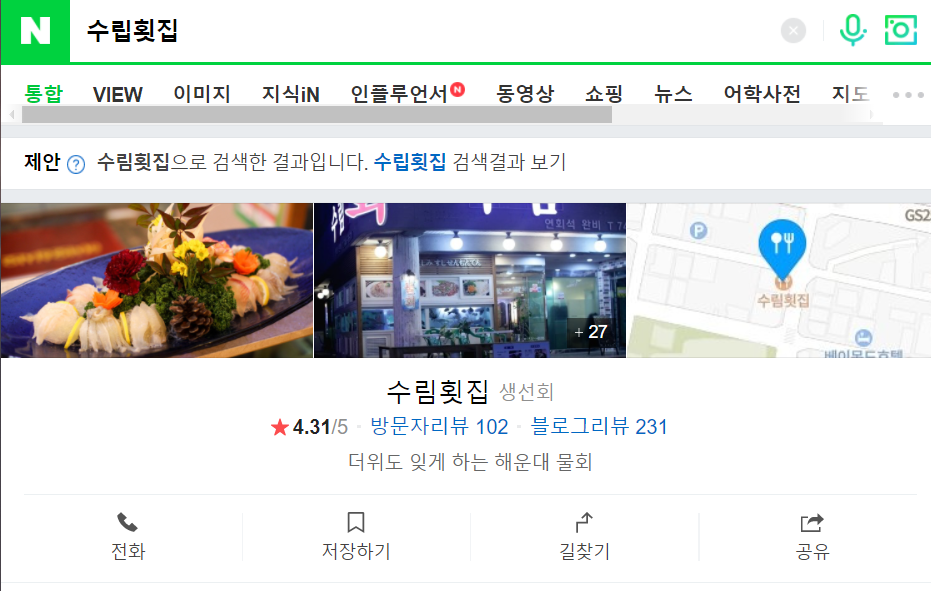

<hr style="border-color:red; border-width:3px">

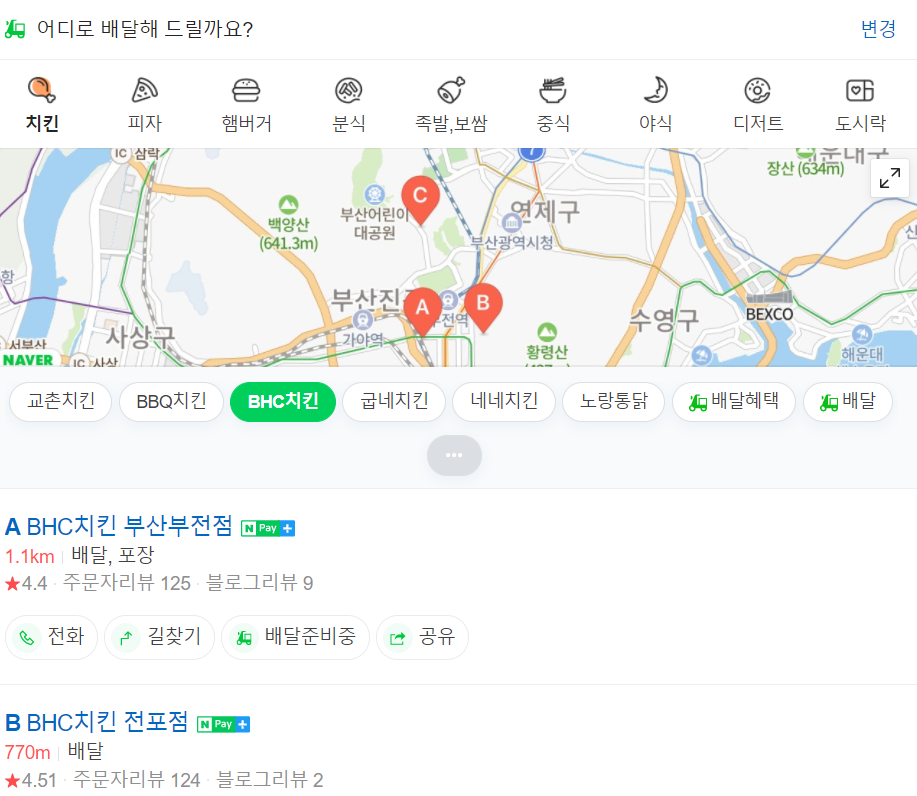

In [ ]:
#전처리된 동이름과 상호명 데이터 프레임을 이용하여, 셀레니움을 돌려서 네이버 지도에서 필요한 값들은 가져오는 과정

#네이버 지도는 크롤링하기 위해서 단순히 xpath, css, html 등의 방법을 사용했지만 실패
#대안으로 모바일 버전 네이버지도를 가져와 (m.naver) 모바일 네이버를 셀레니움을 돌려 크롤링 시작

driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 
map_url = "https://m.search.naver.com/search.naver"
driver.get(map_url)

for i in range(len(df_db)):
    time.sleep(1)
    driver.find_element_by_xpath('''//*[@id="nx_query"]''').clear()  #검색창을 비우는 과정
    keyword = driver.find_element_by_xpath('''//*[@id="nx_query"]''')  #검색창을 변수에 집어넣음
    keyword.send_keys("부산 ",dong[i]," ",name[i])  #검색창에 부산 + 동이름 + 상호명을 넣음
    keyword.send_keys(Keys.ENTER)  #검색지시
    

#위에 나와있는 예시들 처럼 검색창에 동이름이랑 상호를 쳤을때 바로 맛집 정보를 주는 곳이 있는 경우도 있지만, 
#이름이 비슷한 경우에는 음식점이 여러개 나오고 이중에서 첫번째 이름을 클릭함. 
#별점이랑 리뷰가 없을 때는 NULL이라고 입력
    try:
        driver.find_element_by_xpath('//*[@id="loc-main-section-root"]/div/div[4]/ul/li[1]/div[1]/a[1]/div/div/span[1]/mark').click()
        time.sleep(1)
    except:
        try:
            driver.find_element_by_xpath('//*[@id="_title"]/span[1]').click()
            time.sleep(1)
        except:
            try:
                driver.find_element_by_xpath('//*[@id="place-main-section-root"]/div/div[5]/ul/li[1]/div[1]/a/div[1]/div/span[1]').click()
                time.sleep(1)
            except:
                star.append('NULL')
                review.append('NULL')
                blog.append('NULL')
                continue
 #별점의 유무에 따라서 별점이 있다면 크롤링할 정보의 갯수가 3개이고(별점, 일반리뷰, 블로그 리뷰)
#별점이 없다면 크롤링할 정보의 갯수가 2개임(일반리뷰, 블로그 리뷰)
#이렇게 안할경우에는 별점의 자리로 일반리뷰가 앞땡겨져와서 오류가 생김.

#하지만 이모든 과정은 사실 아래 그 어떤 정보든 NULL값이 있다면 날리는 코드를써서 생략가능함
                    
    star_review = driver.find_elements_by_class_name('_1Y6hi')
    count = len(star_review) # 별점이 없다면 같은 클래스를 가진 span요소가 2개가 되고, 별점이 있다면 3개가 됌
    print('%d개' % count)            
    
    if count == 2: #별점이 없고 가져와야할 정보가 일반 리뷰랑 블로그 리뷰 2개인 경우
        star.append('NULL')
        try:
            review.append(driver.find_element_by_xpath('''//*[@id="app-root"]/div/div[2]/div[1]/div/div/div[1]/div/span[1]/a/em''').text)
            #일반리뷰의 갯수를 가져옴
        except:
            review.append('NULL')
        try:
            blog.append(driver.find_element_by_xpath('''//*[@id="app-root"]/div/div[2]/div[1]/div/div/div[1]/div/span[2]/a/em''').text)
            #블로그 리뷰의 갯수를 가져옴
        except:
            blog.append('NULL')
            
    elif count == 3: #별점이 있고 가져와야할 정보가 일반 리뷰랑 블로그 리뷰까지 3개인 경우
        try:
            star.append(driver.find_element_by_xpath('''//*[@id="app-root"]/div/div[2]/div[1]/div/div/div[1]/div/span[1]/em''').text)
            #별점을 가져옴
        except:
            star.append('NULL')
        try:
            review.append(driver.find_element_by_xpath('''//*[@id="app-root"]/div/div[2]/div[1]/div/div/div[1]/div/span[2]/a/em''').text)
            #일반리뷰의 갯수를 가져옴
        except:
            review.append('NULL')
        try:
            blog.append(driver.find_element_by_xpath('''//*[@id="app-root"]/div/div[2]/div[1]/div/div/div[1]/div/span[3]/a/em''').text)
            #블로그 리뷰의 갯수를 가져옴
        except:
            blog.append('NULL')
    else:
        star.append('NULL')
        review.append('NULL')
        blog.append('NULL')
        
    driver.back()

    
driver.close()
driver.quit()

2개
2개
3개
3개


In [ ]:
#별점, 일반, 블로그 리뷰 데이터 프레임을 따로 하나씩 만듦
df_star = pd.DataFrame(star)
df_review = pd.DataFrame(review)
df_blog = pd.DataFrame(blog)

#크롤링할때 star,review,blog 리스트 변수에 각각 값을 넣어줬는데 
#열이름이 0 이었어서 바꿈 
df_star.rename(columns = {0 : 'star'}, inplace = True)
df_review.rename(columns = {0 : 'review'}, inplace = True)
df_blog.rename(columns = {0 : 'blog'}, inplace = True)


df_result = pd.concat([df_db,df_star,df_review,df_blog],axis = 1)

In [ ]:
#크롤링한 파일 전처리하고 csv파일로 저장함
#이미 저장해서 저장하는 코드는 없앰.

In [61]:
# 별점리뷰 크롤링한 파일 불러오기
df_result = pd.read_csv('df_result.csv')

In [62]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1914 non-null   int64  
 1   Name        1914 non-null   object 
 2   dong        1914 non-null   object 
 3   star        443 non-null    float64
 4   review      500 non-null    object 
 5   blog        530 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 89.8+ KB


# 3. 별점, 일반리뷰, 블로그 리뷰 갯수를 각각의 조건에 따라 처리

In [13]:
df_result = df_result.drop(columns=['Unnamed: 0'], axis=1)
# Unnamed는 setindex로 인데스 정리했을때,
# 원래 적혀있는 인덱스가 Unamed라는 이름의 열로 추가되서 지움

#위에서 null이라는 값을 넣어준 칸은 csv파일로 저장하고 불러오면서 빈칸으로 바뀌었고 빈칸을 0으로 채움
df_result = df_result.fillna(0)

#0이 들어간 칸은 모두 날려버림
#(우리 조의 조건인 별점 평균이상, 일반리뷰 평균이상, 블로그리뷰 10개 이상을 충족시키기 위해서 우선 null 값인건 날림)

for i in range(len(df_result)):
    if (df_result['star'][i] == 0) or (df_result['review'][i] == 0) or (df_result['blog'][i] == 0):
        df_result = df_result.drop(index=[i], axis=0)

#날려버린 데이터의 index값이 제각각이기 때문에 다시 0번부터 정렬        
df_result=df_result.reset_index()


#리뷰의 갯수가 1000가 넘어갈 경우 쉼표가 들어가서 쉼표를 제거하고 별점, 리뷰갯수, 블로그 갯수를 정수형태(int)로 변환
df_result['review'] = df_result['review'].apply(lambda x: x.replace(',', ''))
df_result['blog'] = df_result['blog'].apply(lambda x: x.replace(',', ''))
df_result['star'] = pd.to_numeric(df_result['star'])
df_result['review'] = pd.to_numeric(df_result['review'])
df_result['blog'] = pd.to_numeric(df_result['blog'])

#맛집의 조건인 별점의 평균과 일반리뷰의 평균을 구함.
print(df_result['star'].mean(),df_result['review'].mean())

#별점의 평균인 4.45와 리뷰갯수의 평균값인 215개 그리고 블로그 리뷰 11미만인건 
#맛집이라고 판단을 안하고 그 행을 지움
for i in range(len(df_result)):
    if (df_result['star'][i] < 4.45) or (df_result['review'][i] < 215) or (df_result['blog'][i] < 11):
        df_result = df_result.drop(index=[i], axis=0)

df_result=df_result.reset_index()

#정리안된 인덱스값을 정리함
#[0,2]는 맛집이 아니고 부산시민공원이라서 날림

df_result = df_result.drop(['level_0','index'],axis=1)
df_result = df_result.drop([0,2])

#다시 인덱스를 정리
df_result=df_result.reset_index()
df_result = df_result.drop(['index'],axis=1)

4.46155756207675 215.10158013544017


In [14]:
df_result.head()

,Name,dong,star,review,blog
0,수림횟집,부전1동,4.57,38,12
1,부전수구레국밥,부전1동,4.45,124,25
2,대가호,부전1동,4.49,102,18
3,삼원칼국수,부전1동,4.43,281,176
4,원카츠,부전1동,4.48,186,81


In [15]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    215 non-null    object 
 1   dong    215 non-null    object 
 2   star    215 non-null    float64
 3   review  215 non-null    int64  
 4   blog    215 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 8.5+ KB


# 4. 맛집이라고 판단된 음식점의 블로그 리뷰글을 5개씩 크롤링

In [850]:
import requests
import re
from bs4 import BeautifulSoup
from urllib.parse import quote


#네이버에 있는 블로그나 카페는 여러개의 html을 만들고 본문 html에 다른 html파일을 가져아서 한 화면에 렌더링 하는 방법을 사용
#그렇기 때문에 블로그안에 텍스트를 크롤링하기 위해서는 html에 iframe에 다른 html주소가 적혀져있고
#그 소분류된 html속에 있는 텍스트를 가져오려고 소분류된 html주소를 가져옴
def iframe(url):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    res = requests.get(url, headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml") 

    src_url = "https://blog.naver.com/" + soup.iframe["src"]
    
    return src_url
#소분류된 html파일속에 텍스트 문서를 가져오는 과정
def crawling(url):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    res = requests.get(url, headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml") 

    if soup.find("div", {"class":"se-main-container"}):
        print('se-main-container')
        text = soup.find("div", {"class":"se-main-container"}).get_text()
        text = text.replace("\n","")
        text = re.sub('&nbsp; | &nbsp;| \n|\t|\r|\u200b','',text)
        print("성공")
        return text

    else:
        print("실패")
        return "실패"

    
#이전에 만들었던 데이터 프레임의 이름만 가져옴
querys = df_result['Name']

blog_review_text =[]
index_count = 0


#밑에 보이는 결과창에 저희 팀이 정한 맛집의 블로그 5개를 검색하고 성공했는지 확인하는 코드
for query in querys:
    print(index_count,"번째 index")
    blog_text_result = ""
    url = "https://search.naver.com/search.naver?where=post&sm=tab_viw.blog&query=서면" + quote(query)

    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    res = requests.get(url, headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml") 

    posts = soup.find_all("li",{"class":"bx"})
    del posts[0:4] 
    #posts = soup.find_all("li",{"class":"bx"})<- 이게 블로그리스트 따오는건데 블로그리스트랑 태그요소가 완전히 똑같은 다른 값이 0:4에 들어가버려서 지움
    
    index_count += 1
    for post,i in zip(posts,range(5)):
        try:
            post_title = post.find("a",{"class":"api_txt_lines total_tit"}).get_text()
            print("제목 :",post_title)
            post_link = post.find("a",{"class":"api_txt_lines total_tit"})['href']
            blog_text = crawling(iframe(post_link))

            blog_text_result = blog_text_result + blog_text
            blog_text_result = blog_text_result.replace(" ","")
            print("-"*50)
        except:
            print("404에러")
            break
    blog_review_text.append(blog_text_result)

0 번째 index
제목 : 서면 자연산 횟집 수림횟집
se-main-container
성공
--------------------------------------------------
제목 : [부산/서면]아재감성 가득!서면 수림횟집 얼큰한 동태탕
se-main-container
성공
--------------------------------------------------
제목 : 또 부산!(서면•전포 꾸오이아노, 해운대, 수림횟집)
se-main-container
성공
--------------------------------------------------
제목 : 부산전포맛집 전포동술집 [이네] 비프샐러드 (feat.수림횟집)
se-main-container
성공
--------------------------------------------------
제목 : 서면점심'수림횟집'_서면동태탕/서면밥집/서면맛집/부전맛집
se-main-container
성공
--------------------------------------------------
1 번째 index
제목 : 부산 서면 맛집 발견! 부전수구레국밥 솔직후기
se-main-container
성공
--------------------------------------------------
제목 : 부전/서면 수구레국밥 가야포차 선지국밥 꼭 들리는 맛집
se-main-container
성공
--------------------------------------------------
제목 : 부전시장 밥집 : 좋은 가격으로 완벽한 해장의 부전수구레국밥
se-main-container
성공
--------------------------------------------------
제목 : [서면 국밥 맛집] 부전수구레국밥 처음 먹어본 소감
se-main-container
성공
--------------------------------------------------
제목 : [또가고싶은음식점] 서면맛집 

se-main-container
성공
--------------------------------------------------
16 번째 index
제목 : 서면 일식, 서면 이자카야 송정호 일식집
se-main-container
성공
--------------------------------------------------
제목 : 서면 일식집 서면 이자까야 서면 '송정호'
se-main-container
성공
--------------------------------------------------
제목 : [부산 서면] 송정호 - 서면 일식 맛집 오마카세 추천
se-main-container
성공
--------------------------------------------------
제목 : 서면 일식집 이자카야 맛집 :: 도미조림이 맛있는 송정호 일식집
se-main-container
성공
--------------------------------------------------
제목 : 서면 일식집, 서면 이자까야 '송정호'
se-main-container
성공
--------------------------------------------------
17 번째 index
제목 : [부산/레스토랑] 서면 이탈리안 레스토랑 더브릭하우스
se-main-container
성공
--------------------------------------------------
제목 : 서면 더브릭하우스 & 종묘사
se-main-container
성공
--------------------------------------------------
제목 : 서면 더브릭하우스 : 화덕피자가 맛있는 레스토랑
se-main-container
성공
--------------------------------------------------
제목 : 누가 주인공인지? 감사의 와인모임 - 서면 더브릭하우스
실패
----------------------------------------

se-main-container
성공
--------------------------------------------------
32 번째 index
제목 : 서면 밥맛나는세상 짜계치/김밥/떡볶이 서면밥집 추천!
se-main-container
성공
--------------------------------------------------
제목 : 짜계치/떡볶이 서면 [밥맛나는세상]
실패
--------------------------------------------------
제목 : [서면밥집] 배부르게 한끼식사를 할수 있는곳 _ 밥맛나는세상 밥상
se-main-container
성공
--------------------------------------------------
제목 : 밥맛나는세상 부전점 뚝배기 불고기 맛있어요
se-main-container
성공
--------------------------------------------------
제목 : 서면 부전동 밥집 밥맛나는세상
실패
--------------------------------------------------
33 번째 index
제목 : 돌체카라멜칩, 서면 일취월잔, 술나방바, 기장 동부산 롯데아울... 
se-main-container
성공
--------------------------------------------------
제목 : 파리바게트 리코타치즈 샐러드 칼로리 및 파리바게트 빵추천
se-main-container
성공
--------------------------------------------------
제목 : 서면 일식집, 서면 이자까야 '송정호'
se-main-container
성공
--------------------------------------------------
제목 : 서면롯데백화점 빵이 맛있는 옵스 OPS
se-main-container
성공
--------------------------------------------------
제목 :

se-main-container
성공
--------------------------------------------------
제목 : 송도 투움바떡볶이 맛집 달토끼의 떡볶이 흡입구역 야식 배달
se-main-container
성공
--------------------------------------------------
제목 : 송도로제떡볶이맛집 달토끼의떡볶이흡입구역에서 투움바떡볶이!
se-main-container
성공
--------------------------------------------------
제목 : 서면배달 :: <달토끼의 떡볶이흡입구역> 투움바떡볶이 솔직후기
se-main-container
성공
--------------------------------------------------
제목 : 내포 맛집 달토끼의 떡볶이 흡입구역 로제떡볶이에 베이컨이 듬뿍
se-main-container
성공
--------------------------------------------------
49 번째 index
제목 : 서면신상술집 ‘일일시호주日日是好酒’ 분위기좋은이자까야... 
se-main-container
성공
--------------------------------------------------
제목 : 서면/일일시호주 깔끔하고 분위기 좋은 전포동 술집 추천... 
se-main-container
성공
--------------------------------------------------
제목 : [서면] 이자카야 술집 :: 일일시호주
se-main-container
성공
--------------------------------------------------
제목 : 퀄리티에 반하는 일식당 서면 일일시호주
se-main-container
성공
--------------------------------------------------
제목 : 분위기 좋은 서면 술집 일일시호주 솔직후기
se-main-container
성공
--

se-main-container
성공
--------------------------------------------------
제목 : 서면어썸루프탑 칵테일무제한
se-main-container
성공
--------------------------------------------------
제목 : 골라먹는 재미가 있는 서면 칵테일 무제한 "어썸루프탑"
se-main-container
성공
--------------------------------------------------
64 번째 index
제목 : [부산] 서면 안주가 맛있는 신상 술집 추천 ‘한끗’ 에서 술... 
se-main-container
성공
--------------------------------------------------
제목 : 서면 술집 한끗 :: 내장찜 안주 존맛 추천!
se-main-container
성공
--------------------------------------------------
제목 : 서면 술집 한끗 새롭네
se-main-container
성공
--------------------------------------------------
제목 : [서면술집]내장찜이 맛있는 안주맛집 한끗
se-main-container
성공
--------------------------------------------------
제목 : 서면 신상 술집 한끗 내장찜 핫해
se-main-container
성공
--------------------------------------------------
65 번째 index
제목 : 서면 로위버거 : 푸짐하고 두터운 패티의 통새우 버거
se-main-container
성공
--------------------------------------------------
제목 : 새우버거 맛집 부산 서면 로위버거 패티 두께 놀라워ㄹr!
se-main-container
성공
----------------------------------

제목 : 부산 서면 롯데백화점 스시 초밥 '김영태스시L'
se-main-container
성공
--------------------------------------------------
제목 : <서면 스시 맛집> 김영태 스시L 부산 롯데본점
se-main-container
성공
--------------------------------------------------
제목 : 서면스시가 먹고 싶을땐 부산롯데백화점본점 김영태스시L
se-main-container
성공
--------------------------------------------------
제목 : 서면스시 깔끔 그자체 김영태스시L
se-main-container
성공
--------------------------------------------------
제목 : 부산 롯백 본점 맛집 서면 초밥은 김영태스시 L
se-main-container
성공
--------------------------------------------------
80 번째 index
제목 : 서면 안쪽집 이베리코 돼지김치구이를 맛 볼 수 있는 밥집:-)
실패
--------------------------------------------------
제목 : [일상] 부산 광안리 해수욕장 패들타기+물놀이, 서면 담스
실패
--------------------------------------------------
제목 : [서면 술집] 담스펍(Dam's Pub) - 서면맥주집
실패
--------------------------------------------------
제목 : 서면펍 제 마음의 담스~DAM'S PUB 좋아요!
se-main-container
성공
--------------------------------------------------
제목 : [서면사보이]서면맥주/서면분위기있는맥주집/사보이/서면술집
실패
--------------------------------------------------
8

se-main-container
성공
--------------------------------------------------
제목 : 부산 서면 우동 맛집 백종원 역전우동0410
se-main-container
성공
--------------------------------------------------
95 번째 index
제목 : 서면 런투유 갈려다 서면 청춘스타 복고떼창포차 다녀온 후기
se-main-container
성공
--------------------------------------------------
제목 : 서면술집 추천 서면핫플 청춘스타 복고 떼창포차
se-main-container
성공
--------------------------------------------------
제목 : 서면포차 청춘스타 :: 복고떼창이 가능한 서면 감성 포차!!
se-main-container
성공
--------------------------------------------------
제목 : 서면포차:: 복고떼창포차 청춘스타 벌써 또 가고 싶다
se-main-container
성공
--------------------------------------------------
제목 : 서면 청춘스타 복고떼창포차 단체모임, 돈고래수육 편육 주문
se-main-container
성공
--------------------------------------------------
96 번째 index
제목 : 맛집] 서면 롯데백화점 맛집 - '탄탄면공방 부산롯데서면점... 
se-main-container
성공
--------------------------------------------------
제목 : [부산/서면] 탄탄면공방 부산롯데서면점
se-main-container
성공
--------------------------------------------------
제목 : 서면 혼밥추천, 탄탄면공방 부산롯데서면점
se-main-container
성공

se-main-container
성공
--------------------------------------------------
111 번째 index
제목 : 와인하면 떠오르는 신상 서면 술집 구스타보 대추천
se-main-container
성공
--------------------------------------------------
제목 : [서면 와인바] 분위기 맛 모두 반한 신상 술집 구스타보
se-main-container
성공
--------------------------------------------------
제목 : 서면 와인바 구스타보 다시 방문해서 샤도네이 즐기기
se-main-container
성공
--------------------------------------------------
제목 : 서면 레스토랑 구스타보 와인바
se-main-container
성공
--------------------------------------------------
제목 : 서면 데이트 와인과 다양한 요리, 구스타보
se-main-container
성공
--------------------------------------------------
112 번째 index
제목 : 서면루프탑 힛더비치, 이국적인 분위기로 즐기는 서면칵테일... 
실패
--------------------------------------------------
제목 : 서면루프탑 힛더비치에서 레벨스 피자 냠냠!
se-main-container
성공
--------------------------------------------------
제목 : 넘 좋았던 서면루프탑 힛더비치
se-main-container
성공
--------------------------------------------------
제목 : [서면술집] 서면 뷰 좋은 칵테일 바, 힛더비치
se-main-container
성공
--------------------------------------------

se-main-container
성공
--------------------------------------------------
제목 : (서면 술집 추천)서면 술집 계수작 이곳은 술집인가 파스타집인가!
se-main-container
성공
--------------------------------------------------
127 번째 index
제목 : 24시간 카페] 부산 서면 24시간 카페 투썸플레이스 서면일번가점
se-main-container
성공
--------------------------------------------------
제목 : 투썸플레이스 서면 일 번가점
se-main-container
성공
--------------------------------------------------
제목 : 7월 T데이 내맘대로 혜택 투썸... 투썸플레이스 서면일번가점
se-main-container
성공
--------------------------------------------------
제목 : 부산 서면 투썸플레이스 서면일번가점
se-main-container
성공
--------------------------------------------------
제목 : 서면 카공하기 좋은 카페 :: '투썸플레이스 서면일번가점' 메뉴... 
se-main-container
성공
--------------------------------------------------
128 번째 index
제목 : 서면 고기집 돈꽃피는집 흑돼지의 풍미는 역시 최고
se-main-container
성공
--------------------------------------------------
제목 : 맛있었던 서면고기집 돈꽃피는집
se-main-container
성공
--------------------------------------------------
제목 : 서면 고기집 돈꽃피는집으로 흑돼지먹으러 고!
se-main-container
성공
-----

se-main-container
성공
--------------------------------------------------
제목 : 서면 배스킨라빈스31 X PEANUTS 스누피 부산태화점 솔직후기
se-main-container
성공
--------------------------------------------------
제목 : 서면이색데이트/부산원데이클래스::반지마을 서면일번가점
se-main-container
성공
--------------------------------------------------
제목 : 부산진구 서면 부전동... 텐퍼센트커피 서면일번가점 * 메뉴... 
se-main-container
성공
--------------------------------------------------
143 번째 index
제목 : [부산/서면카페]돌멩이로 유명한 카페 '모리도중'
se-main-container
성공
--------------------------------------------------
제목 : 서면 모리도중 무채색 느낌의 돌멩이 카페
se-main-container
성공
--------------------------------------------------
제목 : 서면 카페 모리도중 분위기 감성 친절까지 완벽한 핫플
se-main-container
성공
--------------------------------------------------
제목 : [서면 모리도중] 여기를 봐도 돌, 저기를 봐도 돌 ?!... 
se-main-container
성공
--------------------------------------------------
제목 : 서면맛집 칸다소바 & 서면카페 모리도중
se-main-container
성공
--------------------------------------------------
144 번째 index
제목 : 190614 서면 버거킹 부산태화점 킹모닝 - 베이컨 크루아상...

se-main-container
성공
--------------------------------------------------
제목 : 서면 맛집 찾는다면 삼정타워 5층 우성돈까스 추천해요
se-main-container
성공
--------------------------------------------------
158 번째 index
제목 : 부산 서면 삼정타워 맛집 '쉐이크쉑' 쉑쉑버거 먹었어요
se-main-container
성공
--------------------------------------------------
제목 : [부산/서면 삼정타워]쉑쉑버거 서면, 쉐이크쉑서면점
se-main-container
성공
--------------------------------------------------
제목 : 부산 서면 삼정타워 맛집 쉐이크쉑 쉑쉑버거
se-main-container
성공
--------------------------------------------------
제목 : 부산 쉑쉑버거 서면 쉐이크쉑 메뉴, 가격, 영업시간, 미국 비교... 
se-main-container
성공
--------------------------------------------------
제목 : 쉑쉑버거 메뉴 추천, 서면 삼정타워맛집 쉐이크쉑 후기
se-main-container
성공
--------------------------------------------------
159 번째 index
제목 : 서면펍 이분생, 저렴하게 즐기는 부산서면술집
se-main-container
성공
--------------------------------------------------
제목 : 서면 술집*이분생*
se-main-container
성공
--------------------------------------------------
제목 : 서면 이분생에서 안주 많이 먹고 왔어요!
se-main-container
성공
-----------------

제목 : 서면분식맛집 - 신전떡볶이 생생 리얼후기~~~
se-main-container
성공
--------------------------------------------------
제목 : 최애떡볶이 서면 [신전떡볶이]
se-main-container
성공
--------------------------------------------------
제목 : 서면 신전떡볶이 매콤한게 땡길땐 "신전"
se-main-container
성공
--------------------------------------------------
제목 : 부산 서면 : 신전떡볶이 (신전치즈김밥**)
se-main-container
성공
--------------------------------------------------
제목 : 매운음식이 최고! 서면 쏘핫 마라탕, 신전떡볶이, 강릉 교동반점
se-main-container
성공
--------------------------------------------------
174 번째 index
제목 : 먹긴불편하지만 맛은 있음! 서면 수제버거 버거스올마이티
se-main-container
성공
--------------------------------------------------
제목 : 100% 소고기패티 서면수제버거 버거스올마이티
se-main-container
성공
--------------------------------------------------
제목 : 서면 수제버거 두툼한 패티 육즙가득 버거스올마이티
se-main-container
성공
--------------------------------------------------
제목 : 서면 수제버거 맛집 두툼한 패티 버거스올마이티
se-main-container
성공
--------------------------------------------------
제목 : 서면 수제버거 맛있는 버거스올마이티
se-main-container
성공
----------

se-main-container
성공
--------------------------------------------------
제목 : 서면칼국수 서면밥집 배가왕서면점
se-main-container
성공
--------------------------------------------------
제목 : 서면 점심추천)) 배가왕 칼국수
se-main-container
성공
--------------------------------------------------
189 번째 index
제목 : 부산 서면 분위기 좋은 신상 술집 우와한
se-main-container
성공
--------------------------------------------------
제목 : [서면 술집] 우와한
se-main-container
성공
--------------------------------------------------
제목 : [#79. 서면 술집/맛집_우와한(신상술집)]
se-main-container
성공
--------------------------------------------------
제목 : [우와한] 서면 분위기가 심상치않은 다이닝 펍 :: 부전동 우와한... 
se-main-container
성공
--------------------------------------------------
제목 : [서면 맛집] 우와한 _다이닝 펍 _
se-main-container
성공
--------------------------------------------------
190 번째 index
제목 : 부산밀탑빙수/서면세광양대창/대동할매국수... 
se-main-container
성공
--------------------------------------------------
제목 : 서면 세광양대창
se-main-container
성공
--------------------------------------------------
제목 : 서면 세광양대창_특

se-main-container
성공
--------------------------------------------------
제목 : 서면 맛집 레벨스,시티뷰 피자맛집!하프앤하프로 결정장애퇴치
se-main-container
성공
--------------------------------------------------
제목 : [서면맛집]레벨스(LEVELS)
se-main-container
성공
--------------------------------------------------
205 번째 index
제목 : 부산서면초밥 :: 1950원 회전초밥 용이초밥 서면점
se-main-container
성공
--------------------------------------------------
제목 : 부산서면초밥 용이초밥 모든초밥 한접시 1950원 가성비 짱이야
se-main-container
성공
--------------------------------------------------
제목 : 부산서면맛집 회전초밥 용이초밥 서면점
se-main-container
성공
--------------------------------------------------
제목 : 서면초밥[용이초밥]:1950에 가성비갑!!
se-main-container
성공
--------------------------------------------------
제목 : 서면맛집 부산진구 용이초밥 서면 회전초밥 가성비 좋은... 
se-main-container
성공
--------------------------------------------------
206 번째 index
제목 : 부전동술집 서면역술집 도쿄시장 서면점
se-main-container
성공
--------------------------------------------------
제목 : 분위기 좋고, 가성비 좋은 안주들이 가득한 "도쿄시장 서면점"
se-main-container
성공
---------

In [16]:
# 블로그 리뷰 크롤링한 파일 불러오기

# df_blog_review_text = pd.read_csv('blog_text.txt')
# df_blog_review_text = df_blog_review_text.drop(columns=['Unnamed: 0'], axis=1)

In [18]:
# crawling = pd.concat([df_result,df_blog_review_text],axis = 1)
# crawling = crawling.rename(columns={0:'blogReviewText'})

In [2]:
#저장한 완성 파일 불러옴(크롤링한 데이터프레임의 저장하는 코드는 한번만 사용하면 되서 지움)

crawling = pd.read_csv('crawling.txt')
crawling = crawling.drop(columns=['Unnamed: 0'], axis=1)

In [3]:
#몇번째의 널값이 있는지 확인함

crawling[crawling['blogReviewText'].isnull()]

,Name,dong,star,review,blog,blogReviewText
99,스시미르네,부전2동,4.39,899,378,NaN


In [4]:
#위에서 확인한 널값이 99번째 인덱스에 있는것을 확인후에 널값이 있는 밥집을 아예 지워버림.

crawling = crawling.drop(index=[99], axis=0)

In [5]:
#99번 인덱스를 지워서 비워졌기 떄문에, 다시 인덱스를 조정하여서 빈 인덱스를 없앰.

crawling = crawling.reset_index()
crawling = crawling.drop(columns=['index'], axis=1)

In [6]:
crawling.head()

,Name,dong,star,review,blog,blogReviewText
0,수림횟집,부전1동,4.57,38,12,지난출장에거래처지인들과함께저녁식사!알고찾아간건아니라돌다가들어간집인데오랜만에완전한국식...
1,부전수구레국밥,부전1동,4.45,124,25,BUSAN부산서면맛집;부전수구레국밥부산여행은#staygold_부산이번부산여행숙소도캘...
2,대가호,부전1동,4.49,102,18,안녕하세영🖐😀중식먹은지육개월이넘어서....오랜만에서칭해서중국집에가봅니다.오늘은서면역...
3,삼원칼국수,부전1동,4.43,281,176,"FOOD삼원칼국수POSTEDONSEP08,2020서면롯데백화점맞은편영광도서라인은갈일..."
4,원카츠,부전1동,4.48,186,81,안녕하세요~😀😀오늘은서면돈까스맛집원카츠에다녀왔는데다양한돈까스메뉴를맛있게먹고와서포스팅...


In [7]:
crawling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
Name              214 non-null object
dong              214 non-null object
star              214 non-null float64
review            214 non-null int64
blog              214 non-null int64
blogReviewText    214 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 10.1+ KB


# 5. 블로그 데이터를 기반으로 유사도 분석시작

In [8]:
#크롤링한 블로그의 텍스트만 따로 분석하기 위해서 x_data로 변수 설정

x_data = crawling['blogReviewText']
x_data = pd.DataFrame(x_data)

In [9]:
#Tf-idf를 돌리기 위한 준비과정

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1, 3),
    min_df=2,   
    max_features=10000,
    sublinear_tf=True,
    lowercase=False,
    use_idf=True)

# blogReviewText 대해서 tf-idf 수행
x_data_vec = vectorizer.fit_transform(x_data['blogReviewText'])

In [10]:
x_data_vec.shape #shape : 몇행 몇열인지 반환 == 214행 5773열

(214, 5773)

In [11]:
#유사도 분석

from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(x_data_vec, x_data_vec)
cosine_sorted = cosine.argsort()[:, ::-1]

In [12]:
restaurant = pd.DataFrame()

In [14]:
# 앞에서 구한 각각의 데이터의 분석 결과 값에 팀에서 정한 가중치를 주어서 팀만의 점수를 줌
# 유사도가 중요하다고 생각하기 때문에 *1을 했고 별점값에 별점의 길이를 곱해서 *0.001을 함으로서 가중치를 낮게 줌

score = (
    +cosine*1
    +np.repeat([crawling['star'].values], len(crawling['star']) , axis=0) * 0.001
)

score_sorted = score.argsort()[:, ::-1] #원래 argsort()는 작은 값부터 순서대로 데이터의 index를 반환해줌,
                                        #하지만 [::-1]를 붙일 경우 내림차순으로 반환해준다는 것임
                                        #그러므로 2차원 배열 인덱스를 내림차순으로 반환해준다는 뜻임

def find_simi_place(crawling, sorted_ind, place_name, top_n):
    
    compare = 0 # 검색한 음식을 제일 많이 언급한 블로그 글에서 음식이 몇번쓰였는지
    index = 0   #index는 그 음식을 많이 쓴 블로그의 인덱스 번호
    
    contains_name = crawling[crawling['Name'].str.contains(place_name)] # 검색하고 싶은 음식(place_name)이 상호명에 포함되어 있는지 확인하고 있다면 contain_name에 넣음
    contains_name = contains_name.iloc[0:1]# 그 상호명을 제일 첫행으로 가져옴
    
    if contains_name.empty:#만약 상호명에 검색한 음식이 없다면 데이터 프레임이 비어있음,
                           #상호명에 없으니 블로그에 글속에서 검색하고 싶은 음식이 있는지 찾고 많이 언급된 블로그 글을 찾은 음식점의 상호명과 정보를 가져옴
        print('DataFrame is empty!\nSearch blog review..')
        contains_name = crawling[crawling['blogReviewText'].str.contains(place_name)]#검색하고싶은 음식이 텍스트에 포함된 블로그 글을 가져와서 변수에 저장함
        
        for i in range(len(contains_name['blogReviewText'])): # 검색하고 싶은 음식을 블로그 글에서 더 많이 포함한 음식점이 더 정확하다고 판단 ->  
                                                               # 비교->블로그글에 음식을 가장많이 포함한 상호명 찾음
            if contains_name['blogReviewText'].iloc[i].count(place_name) > compare:
                compare = contains_name['blogReviewText'].iloc[i].count(place_name)
                index = i
        contains_name = contains_name.iloc[index:index+1]
        # 검색하고 싶은 음식을 블로그 글에서 가장많이 포함한 글을 찾고, 
        # 그 글의 상호명의 인덱스값을 찾은후에 그 인덱스 값에 해당하는 행을 찾아서 contains_name에 저장
        # (예를 들어 블로그 유사도를 검색했을 떄, 부산어묵이 어묵을 가장 많이 포함한 블로그 글을 갖고있는 상호명이면,)
        # (부산어묵의 인덱스 값을 찾아서 부산어묵의 정보를 갖고있는 행을 반환해줌)
        # index:index + 1인 이유는 index는 그 행의 번호 :index + 1은 첫번째 열인 index를 제외한 두번째 열부터 가져오기위함

        if contains_name.empty: #만약 그럼에도 비어있다면 데이터가 없다고 출력
            print('No Data')
            
    place_index = contains_name.index.values #위에서 찾은 검색어와 연관있는 음식점이름의 인덱스 값을 변수에 저장
    similar_indexes = sorted_ind[place_index, :(top_n)] #연관있는 음식점을 최대 몇개(top_n)까지 뽑을건지 정하고,
                                                        #앞에서 정해진 연관성이 있는 음식점과 유사한 음식점을 그 갯수만큼 뽑은후에
                                                        #별점과 유사도를 기반으로 한 score의 순서로 정렬
    similar_indexes = similar_indexes.reshape(-1) #행을 하나씩 출력함
    
    return crawling.iloc[similar_indexes] #검색한 음식과 관련이 높은 음식점의 정보(==행)을 반환함

In [15]:
food = input('음식 : ') #검색하고 싶은 음식을 입력


restaurant = find_simi_place(crawling, score_sorted,food,5)# 예를들어 국밥이라는 음식을 찾고싶다면, 
                                                           # 국밥이라는 단어가 포함된 상호명이나, 그 음식이 많이 들어간 블로그글을 찾고,
                                                           # 찾은 음식점을 기준으로 유사한 음식점을 4개를 찾은후에 정렬함.
restaurant = restaurant.drop(['blogReviewText'],axis =1 )  # 블로그 글은 삭제하고 관련있는 음식점 정보만 출력
restaurant

음식 : 국밥


,Name,dong,star,review,blog
1,부전수구레국밥,부전1동,4.45,124,25
32,밥맛나는세상,부전1동,4.54,132,17
44,일품장원국밥,부전1동,4.37,356,212
153,베트남쌀국수퍼란,부전2동,4.55,290,84
103,김태정바베큐치킨,부전2동,4.48,54,134


In [ ]:
# 1번 행은 국밥이라는 단어를 쳤을 때 상호명에 국밥이 있거나 블로그에서 언급이 많이된 음식점을 보여줌
# 2-5번행은 1번행에서 찾은 음식점과 유사한 네개의 밥집을 찾아서 보여줌

<br>

# 6. 입력받아서 크롤링 -> word cloud 
## (4번 항목과 아주 비슷한 코드이므로 다른 부분을 제외하고 코드 설명은 생략)

In [16]:
# 4번 항목과 아주 비슷하지만 차이점은 사용자가 검색한 음식과 관련된 음식점의 블로그들과 정보만을 가져옴. 

import requests
import re
from bs4 import BeautifulSoup
from urllib.parse import quote

def iframe(url):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    res = requests.get(url, headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml") 

    src_url = "https://blog.naver.com/" + soup.iframe["src"]
    
    return src_url

def crawling(url):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    res = requests.get(url, headers=headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml") 

    if soup.find("div", {"class":"se-main-container"}):
        print('se-main-container')
        text = soup.find("div", {"class":"se-main-container"}).get_text()
        text = text.replace("\n","")
        text = re.sub('&nbsp; | &nbsp;| \n|\t|\r|\u200b','',text)
        print("성공")
        return text

    else:
        print("실패")
        return "실패"
    
blog_review_text =[]
index_count = 0
food = input('음식 : ') # 검색하고 싶은 음식을 input함수로 받고 변수에 저장함
blog_text_result = ""
url = "https://search.naver.com/search.naver?where=post&sm=tab_viw.blog&query=서면" + quote(food) # 검색한 음식과 관련된 블로그를 찾음

headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
res = requests.get(url, headers=headers)
res.raise_for_status()
soup = BeautifulSoup(res.text, "lxml") 

posts = soup.find_all("li",{"class":"bx"})
del posts[0:4]
    
index_count += 1
for post,i in zip(posts,range(5)):
    try:
        post_title = post.find("a",{"class":"api_txt_lines total_tit"}).get_text()
        print("제목 :",post_title)
        post_link = post.find("a",{"class":"api_txt_lines total_tit"})['href']
        blog_text = crawling(iframe(post_link))

        blog_text_result = blog_text_result + blog_text
        blog_text_result = blog_text_result.replace(" ","")
        print("-"*50)
    except:
        print("404에러")
        break
blog_review_text.append(blog_text_result)

음식 : 국밥
제목 : 서면국밥 뜨끈하게 든든한 98도씨국밥
se-main-container
성공
--------------------------------------------------
제목 : 부산돼지국밥맛집, 포항돼지국밥 3대째 운영 중인 서면돼지국밥
se-main-container
성공
--------------------------------------------------
제목 : 부산돼지국밥맛집 서면돼지국밥 "포항돼지국밥"
se-main-container
성공
--------------------------------------------------
제목 : 부산 서면 국밥 ] 가야포차 선지국밥 24시 - 무료주차... 
se-main-container
성공
--------------------------------------------------
제목 : 맛있는녀석들도 반해버린 서면국밥
se-main-container
성공
--------------------------------------------------


In [17]:
blog_review_text = pd.DataFrame(blog_review_text)

In [18]:
blog_review_text[0]

0    점심시간엔역시뭘먹을지최대고민을하죠오늘도저희는생각을해보다날이조금덥긴하지만속을든든하게채...
Name: 0, dtype: object

In [19]:
from collections import Counter
from konlpy.tag import Twitter

articles = blog_review_text[0].tolist() # tolist를 통해 같은 위치 또는 레벨에 있는 데이터끼리 묶어준다
articles = ''.join(articles)

twitter = Twitter()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True)

# 필요없는 단어나 글자를 제거함
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])

word_counted = Counter(word_cleaned)
word_dic = dict(word_counted)
        
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

C:\Users\yeppe\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('국밥', 70),
 ('먹다', 53),
 ('돼지국밥', 36),
 ('서면', 31),
 ('보다', 21),
 ('좋다', 20),
 ('부산', 18),
 ('포항', 17),
 ('들다', 16),
 ('순대', 16),
 ('ㅋㅋㅋ', 16),
 ('따로', 15),
 ('주문', 14),
 ('국물', 14),
 ('수구레국밥', 14),
 ('맛있다', 13),
 ('나오다', 12),
 ('넣다', 12),
 ('많다', 11),
 ('야포', 10),
 ('내장', 9),
 ('차선', 9),
 ('부산진구', 8),
 ('고기', 8),
 ('하나', 8),
 ('테이블', 8),
 ('없다', 8),
 ('포차', 8),
 ('부산광역시', 7),
 ('섞다', 7),
 ('맛집', 7),
 ('부추', 7),
 ('되어다', 7),
 ('뜨다', 7),
 ('김치', 7),
 ('모습', 7),
 ('수구레', 7),
 ('꼬막', 7),
 ('레이첼', 7),
 ('갈비', 7),
 ('역시', 6),
 ('생각', 6),
 ('국밥집', 6),
 ('시간', 6),
 ('오다', 6),
 ('들어가다', 6),
 ('유명하다', 6),
 ('맛보기', 6),
 ('기본', 6),
 ('찍다', 6),
 ('셀프', 6),
 ('서다', 6),
 ('선지', 6),
 ('음식', 6),
 ('저희', 5),
 ('98', 5),
 ('도씨', 5),
 ('메뉴', 5),
 ('많이', 5),
 ('새우젓', 5),
 ('양파', 5),
 ('말다', 5),
 ('여기', 5),
 ('ㅎㅎ', 5),
 ('골목', 5),
 ('언니', 5),
 ('넓다', 5),
 ('같다', 5),
 ('방문', 5),
 ('깔끔하다', 5),
 ('녀석', 5),
 ('송정', 5),
 ('영업', 4),
 ('깍두기', 4),
 ('쌈장', 4),
 ('준비', 4),
 ('올리다', 4),
 ('함께', 4),
 ('먹기', 4),
 ('식

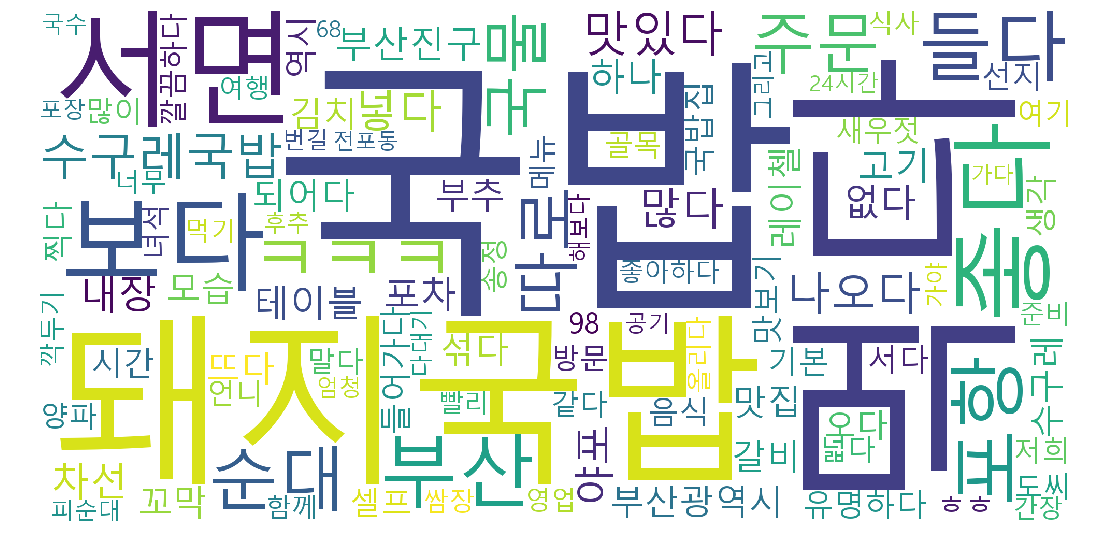

In [21]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.
import matplotlib.pyplot as plt
# 아래 옵션들을 원하시는대로 지정하셔서 가장 마음에 드는 워드클라우드를 활용하시면 됩니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # 한글 폰트 변경
                       width=2000, height=1000, # 실제 워드클라우드 크기 변경 (해상도 변경)
                       max_words=100, # 최대로 보여질 단어 수 제한
                       background_color='white', # 바탕색 지정 (주석처리할 경우 검정으로 변경됨)
#                        max_font_size=100, # 최대 단어 크기 제한
                      ).generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15)) # Jupyter notebook 상에서 보여지는 워드클라우드 크기 지정 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# word_cloud.to_file("word_cloud_7 (white, squared, max100).png")